In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

IMPORTING DATA

In [2]:
data=pd.read_csv('Data.csv')

In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

   no null values hence cleaning of data is not requeried 

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [8]:
data.shape

(2000, 9)

In [9]:
diabetic=(data['Outcome']==1).sum()
non_diabetic=(data['Outcome']==0).sum()

In [10]:
print(f"Count of Diabetic pateients    : {diabetic} ")
print(f"Count of Non-diabetic patients : {non_diabetic}")

Count of Diabetic pateients    : 684 
Count of Non-diabetic patients : 1316


In [11]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


<AxesSubplot:>

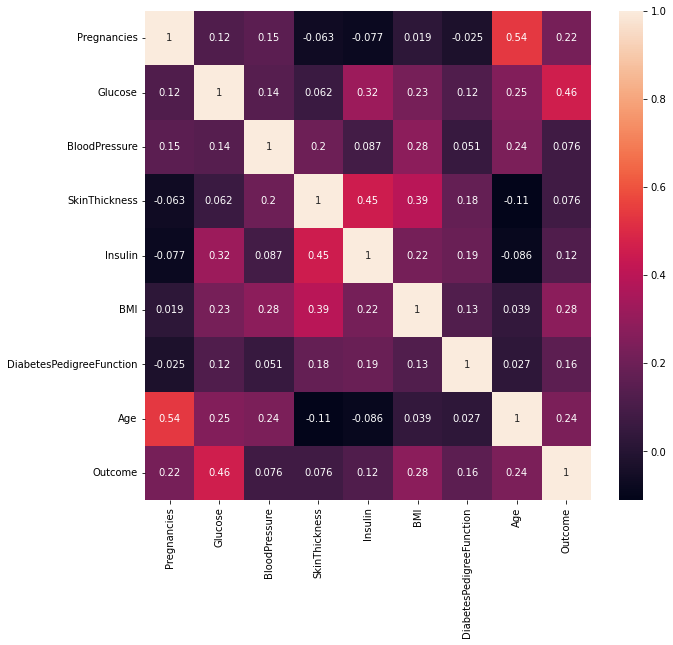

In [55]:
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(),annot=True)

We can drop Blood Pressure and Skin Thickness as they are not highly correlated with Outcome attribute.

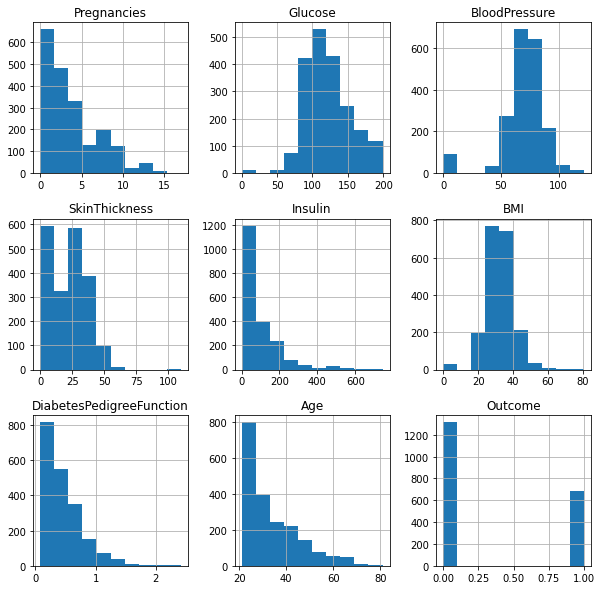

In [56]:
data.hist(bins = 10, figsize = (10,10))
plt.show()

We can see that the Glucose, Blood Pressure, and BMI columns have the normal distribution while the rest have skewed distributions.

In [57]:
#Removing unnessary columns
x = data.drop(["Pregnancies","BloodPressure","SkinThickness","Outcome"],axis = 1)
y = data.iloc[:,-1]

Applying Machine Learning Models 

Step 1: Import Nessary Library

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

Step 2:Split dependent Variables and Independent Variables.Also drop less correlated attributes i.e Blood Pressure And Skin Thickness

data1.info()

In [59]:
print(x.shape)
print(y.shape)

(2000, 5)
(2000,)


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [61]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 5)
(400, 5)
(1600,)
(400,)


In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [63]:
x_train

array([[-0.01485297, -0.71569898, -0.70153446, -0.65077302,  2.50732972],
       [ 1.29329836,  0.29494207,  1.04410009,  1.04381097,  1.21199837],
       [-0.60663571, -0.71569898,  0.87438562, -0.5475188 ,  0.78022125],
       ...,
       [-0.82466093, -0.71569898, -0.03479904, -0.94838813, -0.16968841],
       [-1.13612553, -0.71569898, -0.26512582, -0.52626057,  0.17573329],
       [ 0.45234393, -0.71569898, -3.91398693,  0.50628164,  3.11181769]])

Step 4:Apply Machine Learning Algorithm and get accuracy

1--->Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
LoR=LogisticRegression()

In [65]:
LoR.fit(x_train,y_train)

LogisticRegression()

In [66]:
y_pred=LoR.predict(x_test)

In [67]:
#Compute classification Accuracy for Logistic Regression
from sklearn import metrics
print(f"Logistic regression Accuracy:{(metrics.accuracy_score(y_test,y_pred))*100}")

Logistic regression Accuracy:77.25


In [68]:
miss_classify=(y_test!=y_pred).sum()
print(f"Missclassified Sample by Logistic algorithm:{miss_classify}")
print(f"Correctly classified Sample:{(y_test==y_pred).sum()}")

Missclassified Sample by Logistic algorithm:91
Correctly classified Sample:309


2---->Naive Bayes Algorithm (Gaussian Algorithm)

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
GaNB= GaussianNB()

In [71]:
# fit the model with the training data
GaNB.fit(x_train,y_train)

GaussianNB()

In [72]:
y_pred = GaNB.predict(x_test)

In [73]:
print(f"Gaussian Naive Bayes Algorithm Accuracy:{(metrics.accuracy_score(y_test,y_pred))*100}")

Gaussian Naive Bayes Algorithm Accuracy:76.75


In [74]:
miss_classify=(y_test!=y_pred).sum()
print(f"Missclassified Sample by Gaussian NB algorithm:{miss_classify}")
print(f"Correctly classified Sample:{(y_test==y_pred).sum()}")

Missclassified Sample by Gaussian NB algorithm:93
Correctly classified Sample:307


3--->KNN Alogrithem

In [75]:
from sklearn.neighbors import KNeighborsClassifier 

In [76]:
knn=KNeighborsClassifier(n_neighbors=1)

In [77]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [78]:
y_pred=knn.predict(x_test)

In [79]:
print(f"KNN Algorithm Accuracy (when kneighbors=1):{(metrics.accuracy_score(y_test,y_pred))*100}")

KNN Algorithm Accuracy (when kneighbors=1):97.75


In [80]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

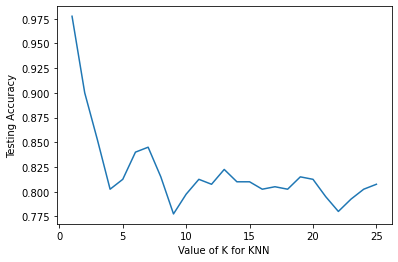

In [81]:
# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Highest test accuracy is when kneighbors=1

In [82]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print(f"KNN Algorithm Accuracy (when kneighbors=6):{((metrics.accuracy_score(y_test,y_pred))*100)}")

KNN Algorithm Accuracy (when kneighbors=6):97.75


In [83]:
miss_classify=(y_test!=y_pred).sum()
print(f"Missclassified Sample by KNN algorithm:{miss_classify}")
print(f"Correctly classified Sample:{(y_test==y_pred).sum()}")


Missclassified Sample by KNN algorithm:9
Correctly classified Sample:391


4--->Random forest algorithem

In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=400,n_estimators=200)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=400)

In [97]:
rfc_train = rfc.predict(x_train)

In [98]:
y_pred=rfc.predict(x_test)

In [99]:
from sklearn import metrics
print(f"random forest Accuracy:{(metrics.accuracy_score(y_test,y_pred))*100}")

random forest Accuracy:99.75


5--->Decision tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [101]:
dtree_train = dtree.predict(x_train)

In [102]:
y_pred=dtree.predict(x_test)

In [103]:
from sklearn import metrics
print(f"Desision Tree Accuracy:{(metrics.accuracy_score(y_test,y_pred))*100}")

Desision Tree Accuracy:99.0


6--->svc

In [104]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [105]:
y_pred=svc_model.predict(x_test)
svc_pred = svc_model.predict(x_test)

In [106]:
from sklearn import metrics
print(f"svc  Accuracy:{(metrics.accuracy_score(y_test,y_pred))*100}")

svc  Accuracy:81.0


SAVING THE MODEL

In [107]:
import pickle
pickle.dump(rfc,open('rfc.pkl','wb'))

In [108]:
pickle.dump(sc, open('sc.pkl', 'wb'))